<a href="https://colab.research.google.com/github/rb58853/ML-RSI-Images/blob/main/code/CLIP-Embedding/CLIPEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rb58853/ML-RSI-Images.git
!python3 -m pip install opencv-python matplotlib
!python3 -m pip install 'git+https://github.com/rb58853/segment-anything.git'

Cloning into 'ML-RSI-Images'...
remote: Enumerating objects: 1003, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1003 (delta 25), reused 43 (delta 23), pack-reused 952
Receiving objects: 100% (1003/1003), 24.43 MiB | 28.79 MiB/s, done.
Resolving deltas: 100% (427/427), done.
  Cloning https://github.com/rb58853/segment-anything.git to /tmp/pip-req-build-yp9gwx_h
  Running command git clone --filter=blob:none --quiet https://github.com/rb58853/segment-anything.git /tmp/pip-req-build-yp9gwx_h
  Resolved https://github.com/rb58853/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=284931853bfb563644d3f943d1f09f6699115d8de0a0b520010e34b7635d6141
  Stored in directory: /tmp/pip-ephem-wheel-cache-0puj2ib9/wheels/5b/3b/a9/8a4ffebff15c8288d2f9fb53f57947811c48cc909

In [2]:
import os
os.chdir('ML-RSI-Images/code/CLIP-Embedding')
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-12-25 00:37:56--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.10, 13.227.219.70, 13.227.219.33, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   218MB/s    in 11s     

2023-12-25 00:38:06 (227 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [3]:
from clip_embeding import ClipEmbedding
clip = ClipEmbedding()

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [4]:
from process_images import ProcessImages
process = ProcessImages()

PyTorch version: 2.1.0+cu121
Torchvision version: 0.16.0+cu121
CUDA is available: True


In [5]:
from PIL import Image
image_path = '../../images/'
# image = Image.open(image_path+'image_1.jpg')

In [6]:
ranking = process.ranking(image_path+'image_3.jpg', 'box')

In [7]:
for item in ranking:
    print(f'{item}: {ranking[item]}')

image 0: 1
image 6: 0.9425204396247864
image 21: 0.8441221117973328
image 12: 0.8413178324699402
image 18: 0.8397975564002991
image 17: 0.8145467042922974
image 11: 0.7714503407478333
image 15: 0.7697007060050964
image 20: 0.7145812511444092
image 13: 0.7107961773872375
image 16: 0.70314621925354
image 2: 0.683867871761322
image 3: 0.6529771089553833
image 4: 0.6471889019012451
image 5: 0.6441677808761597
image 7: 0.6379749774932861
image 1: 0.6150767803192139
image 14: 0.6059066653251648
image 10: 0.6008025407791138
image 8: 0.5982453227043152
image 9: 0.5712727308273315
image 19: 0.5643380880355835


In [8]:
subembeddings = process.image_features

In [9]:
image = subembeddings[5]
print(image)#Esto debe imprimir un nombre
print(f'{image[0][:10]}...]')#Esto debe imprimir un embedding

image 5
[-0.14719278  0.02639106 -0.30271205  0.02800149  0.49725765 -0.24058229
  0.01181294  0.37072298  0.45840815  0.32713696]...]


In [10]:
if False:
    process.show_images()

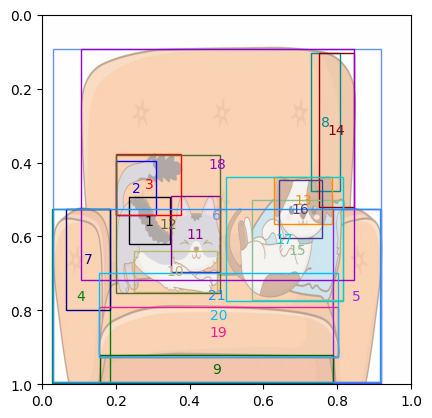

In [11]:
image = process.image_features
image.plot_regions()

In [12]:
image.set_neighbords()

In [13]:
for img in image:
    print(f'___________ {img} ___________'.upper())
    img.print_neighbords()

___________ IMAGE 0 ___________
right:
    ⦿ (image 8, 0.054400000000000004)
    ⦿ (image 14, 0.05)
buttom:
    ⦿ (image 1, 0.10133333333333332)
    ⦿ (image 4, 0.095)
    ⦿ (image 6, 0.18166666666666667)
    ⦿ (image 7, 0.095)
    ⦿ (image 9, 0.015666666666666672)
    ⦿ (image 10, 0.07233333333333333)
    ⦿ (image 11, 0.10166666666666666)
    ⦿ (image 12, 0.12433333333333332)
    ⦿ (image 19, 0.041999999999999996)
    ⦿ (image 20, 0.06033333333333333)
    ⦿ (image 21, 0.09466666666666668)
___________ IMAGE 1 ___________
left:
    ⦿ (image 2, 0.1434314575050762)
    ⦿ (image 4, 0.1542097391598956)
    ⦿ (image 7, 0.15440973915989561)
right:
    ⦿ (image 5, 0.07640973915989561)
    ⦿ (image 8, 0.04808122205599634)
    ⦿ (image 10, 0.1278889744907202)
    ⦿ (image 11, 0.1994)
    ⦿ (image 13, 0.09741197846482992)
    ⦿ (image 14, 0.056154446796632396)
    ⦿ (image 15, 0.13754258141649442)
    ⦿ (image 16, 0.11518011102528383)
    ⦿ (image 17, 0.1698)
top:
    ⦿ (image 0, 0.10133333333333